In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)

# Acquérir les données et créer le Dataframe  

## A) **Scrapping** : 
- Identification des criteres de recherches afin d'avoir plus d'informations. 
- Collecter les données necessaires permettant de prédire le prix final de chaque maison.

## B) **Description des données**:

- Lyon :  239 observations et 29 variables qualitatives. On a 38 observations (pour le site Belle Demeurre) et 201 observations(pour le site SeLoger).



    - sl_prix : prix de vente du bien en euros.
    - sl_style: le type de logement
    - sl_prix :prix de logement en euros (target à predire)
    - sl_année :année de construction
    - sl_gardien :s'il ya un gardien  ou pas 
    - sl_taille : la surface 
    Etc.

In [3]:
dfLyonSL = pd.read_csv("data_lyon_sl.csv")
dfLyonSL.head()

,sl_style,sl_localisation,sl_nb_chambre,sl_taille,sl_prix,sl_paragraphe,sl_salle_d_eau,sl_salle_de_bain,sl_toilette,sl_annee,...,sl_terrasse,sl_gardien,sl_travaux,sl_neuf,sl_parquet,sl_cuisine,sl_vis_a_vis,sl_jardin,sl_piscine,sl_nb_piece
0,Appartement,NaN,3.0,114.0,440000.0,CALUIRE Face au 6E - T4 - ancien rénové avec c...,NaN,NaN,NaN,Année de construction 1900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,Appartement,Quartier Les Brotteaux-Bellecombe-Masséna,2.0,63.0,410000.0,Exclusivité Entrevue Immobilière - T3 Proche P...,NaN,1.0,1.0,Année de construction 1963,...,NaN,NaN,NaN,NaN,NaN,Cuisine équipée,NaN,NaN,NaN,3.0
2,Appartement,Quartier Les Brotteaux-Bellecombe-Masséna,2.0,73.0,475000.0,T3 de 73 m² offrant un séjour en parquet plein...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,Appartement,NaN,1.0,23.0,237000.0,Coup de coeur pour ce magnifique T2 entièremen...,1.0,NaN,1.0,Année de construction 1960,...,NaN,NaN,NaN,NaN,NaN,Cuisine américaine équipée,NaN,NaN,NaN,2.0
4,Appartement,Quartier Les Brotteaux-Bellecombe-Masséna,1.0,39.0,179000.0,Spécial investisseurs ! Appartement 2 pièces a...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Cuisine aucune,NaN,NaN,NaN,2.0


In [4]:
dfLyonBD = pd.read_csv("data_lyon_bd.csv")
dfLyonBD 

,bd_style,bd_nb_chambre,bd_nb_piece,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,bd_ascenseur,...,bd_neuf,bd_parking,bd_parquet,bd_piscine,bd_taille,bd_terrasse,bd_travaux,bd_vis_a_vis,bd_vue,prix
0,Appartement,3,4,"Lyon 6 - Tête-d'Or - Appartement de 106,16 m² ...",NaN,1.0,1.0,Année de construction 1965,4.0,NaN,...,NaN,NaN,NaN,NaN,106,NaN,NaN,NaN,NaN,795000.0
1,Appartement,3,4,Appartement 4 pièces de 110.3m² avec balcon ex...,1.0,1.0,2.0,Année de construction 2000,3.0,Ascenseur,...,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN,NaN,850000.0
2,Appartement,4,5,"Boulevard des Belges, au dernier étage avec ac...",NaN,NaN,NaN,Année de construction 1982,3.0,Ascenseur,...,NaN,NaN,NaN,NaN,130,NaN,NaN,NaN,Belle vue,1450000.0
3,Duplex,3,5,"Situé dans le 6ème arrondissement de Lyon, Pla...",1.0,1.0,2.0,NaN,4.0,Ascenseur,...,NaN,NaN,Parquet,NaN,120,NaN,NaN,NaN,NaN,890000.0
4,Appartement,3,6,A proximité immédiate de l'entrée du Parc de l...,1.0,1.0,1.0,NaN,1.0,Ascenseur,...,NaN,NaN,NaN,NaN,183,NaN,NaN,NaN,NaN,1550000.0
5,Triplex,4,5,Proximité Place Kléber et crs Franklin Rooseve...,1.0,1.0,3.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,136,NaN,NaN,NaN,NaN,910000.0
6,Appartement,4,6,Dans l'axe de la Place Puvis de Chavanne idéal...,2.0,2.0,2.0,Année de construction 1965,1.0,Ascenseur,...,NaN,NaN,Parquet,NaN,231,NaN,NaN,NaN,NaN,1495000.0
7,Appartement,4,6,Venez découvrir ce grand appartement familial ...,NaN,3.0,2.0,Année de construction 1970,6.0,Ascenseur,...,NaN,NaN,NaN,NaN,168,NaN,NaN,NaN,Belle vue,1050000.0
8,Triplex,4,5,Proximité Place Kléber et crs Franklin Rooseve...,1.0,1.0,3.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,136,NaN,NaN,NaN,NaN,910000.0
9,Appartement,3,4,"Cours Vitton, au métro Masséna, en étage élevé...",1.0,1.0,1.0,Année de construction 1900,4.0,Ascenseur,...,NaN,NaN,Parquet,NaN,88,NaN,NaN,NaN,NaN,690000.0


In [5]:
dfLyonBD= dfLyonBD.rename(index=str, columns= {'bd_style': 'sl_style', 'bd_localisation': 'sl_localisation', 'bd_nb_chambre': 'sl_nb_chambre','bd_nb_piece':'sl_nb_piece','bd_paragraphe':'sl_paragraphe', 'bd_salle_d_eau': 'sl_salle_d_eau', 'bd_salle_de_bain':'sl_salle_de_bain', 'bd_toilette':'sl_toilette',
'bd_annee': 'sl_annee', 'bd_etage': 'sl_etage', 'bd_hauteur':'sl_hauteur', 'bd_ascenseur': 'sl_ascenseur', 'bd_vue': 'sl_vue',
       'bd_cave': 'sl_cave', 'bd_parking': 'sl_parking', 'bd_chemine': 'sl_chemine', 'bd_exposition': 'sl_exposition', 'bd_balcon': 'sl_balcon',
       'bd_terrasse':'sl_terrasse', 'bd_gardien':'sl_gardien', 'bd_travaux':'sl_travaux' , 'bd_neuf':'sl_neuf', 'bd_parquet':'sl_parquet',
       'bd_cuisine': 'sl_cuisine', 'bd_vis_a_vis':'sl_vis_a_vis', 'bd_jardin':'sl_jardin', 'bd_piscine':'sl_piscine', 'bd_taille':'sl_taille',
       'prix':'sl_prix'})

In [6]:
dfLyonBD.shape

(38, 29)

In [7]:
dfLyonSL.shape

(201, 29)

In [8]:
df = pd.concat([dfLyonSL, dfLyonBD])

In [9]:
df.shape

(239, 29)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 37
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sl_style          237 non-null    object 
 1   sl_localisation   153 non-null    object 
 2   sl_nb_chambre     221 non-null    float64
 3   sl_taille         235 non-null    float64
 4   sl_prix           235 non-null    float64
 5   sl_paragraphe     239 non-null    object 
 6   sl_salle_d_eau    116 non-null    float64
 7   sl_salle_de_bain  152 non-null    float64
 8   sl_toilette       194 non-null    float64
 9   sl_annee          133 non-null    object 
 10  sl_etage          185 non-null    float64
 11  sl_hauteur        162 non-null    float64
 12  sl_ascenseur      143 non-null    object 
 13  sl_vue            54 non-null     object 
 14  sl_cave           160 non-null    object 
 15  sl_parking        19 non-null     float64
 16  sl_chemine        0 non-null      float64
 17  sl_

# Visualiser les valuers nulles  



A) Gestion des valeurs nulles 

dans les graphiques ci-dessous : nous remarquons que les valeurs non nulles sont supérieures aux valeurs nulles et que certaines  colonnes ne contiennent que des NAN. Supprimons des colonnes qui ne contiennent que des NAN. 


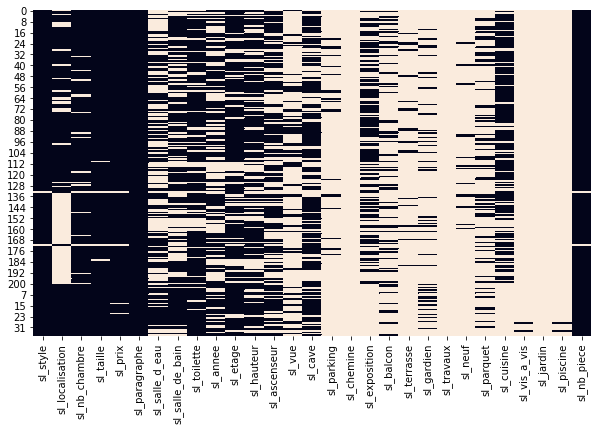

In [11]:
def viz_na(df):
    return sns.heatmap(df.isna(), cbar=False)

viz_na(df)

# on a pas beaucoup de valeur manquante, les features ont des relations en communs 

In [12]:
#missing data
def nan_description(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

nan_description(df)  


,Total,Percent
sl_travaux,239,1.000000
sl_jardin,239,1.000000
sl_chemine,239,1.000000
sl_vis_a_vis,237,0.991632
sl_piscine,237,0.991632
sl_neuf,225,0.941423
sl_parking,220,0.920502
sl_terrasse,219,0.916318
sl_gardien,197,0.824268
sl_balcon,185,0.774059


In [13]:
df = df.drop(["sl_chemine","sl_jardin", "sl_vis_a_vis","sl_travaux", "sl_piscine", "sl_paragraphe"], axis=1)

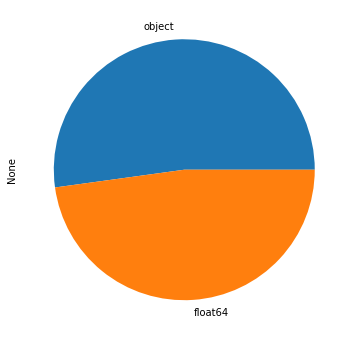

In [14]:
df.dtypes.value_counts().plot.pie()
plt.show()

#  Analyse des données  

In [15]:
categoricals_Lyon = df.select_dtypes(exclude = [np.number])
categoricals_Lyon.describe()

,sl_style,sl_localisation,sl_annee,sl_ascenseur,sl_vue,sl_cave,sl_exposition,sl_balcon,sl_gardien,sl_neuf,sl_parquet,sl_cuisine
count,237,153,133,143,54,160,113,54,42,14,64,147
unique,5,3,51,1,2,11,8,16,1,1,1,8
top,Appartement,Quartier Les Brotteaux-Bellecombe-Masséna,Année de construction 1900,Ascenseur,Vue,Cave,Orientation Est,1 Balcon,Gardien,Refait à neuf,Parquet,Cuisine séparée
freq,226,61,27,143,43,148,38,27,42,14,64,45


##  Analyse des données Target

Lyon : the average sale price of a house is close to 665000€, with most of the values falling within the 340000 to 865000€.


In [16]:
df.sl_prix.describe()

count    2.350000e+02
mean     6.649261e+05
std      4.428601e+05
min      8.000000e+04
25%      3.400000e+05
50%      5.650000e+05
75%      8.650000e+05
max      2.990000e+06
Name: sl_prix, dtype: float64

Dans le graphique ci dessous, nous remarquons que la distribution est asymetrique vers la droite. Afin d'ameliorer la linéarité des données, appliquons "np.log () sur le target"(N.B : np.exp() permet d'inverser la transformation).

C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


skew= 1.7572680252316262


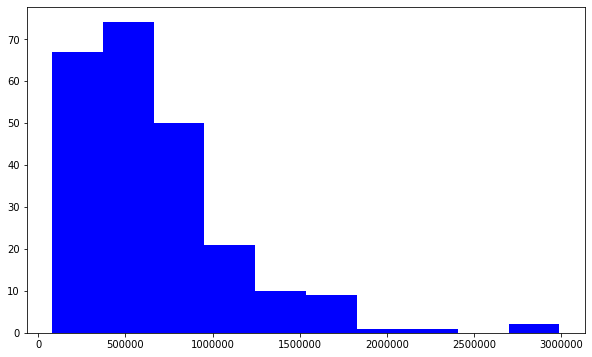

In [17]:
plt.hist(df.sl_prix, color = 'blue')
print ("skew=", df.sl_prix.skew())


D'après les résultats précédents, on remarque que le prix de vente moyen d’une maison est proche de 665000 euros, avec la plupart des valeurs tombant entre 340000 à 865000 euros.

C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


skew= -0.2848637677800953


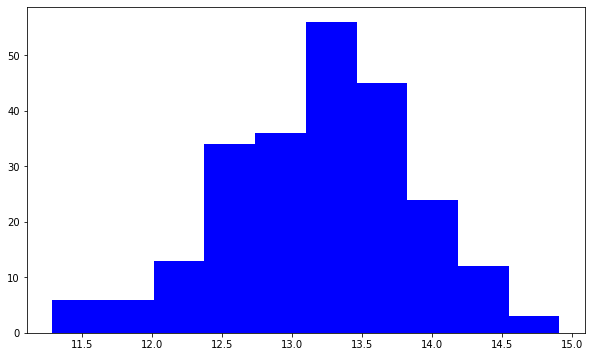

In [18]:
target = np.log(df.sl_prix)
plt.hist(target, color = 'blue')
print ("skew=", target.skew())

   ##  Relation between target and numeric Features

Les 2 premières features sont les plus positivement corrélées avec le prix, tandis que les 2 derniers  sont les plus négativement corrélées.

In [19]:
numeric_features_l = df.select_dtypes(include=[np.number]).corr()

print ("Correlation Lyon", '\n', numeric_features_l['sl_prix'].sort_values(ascending=False)[:6], '\n')
print (numeric_features_l['sl_prix'].sort_values(ascending=False)[-7:])


Correlation Lyon 
 sl_prix             1.000000
sl_taille           0.854806
sl_nb_piece         0.768152
sl_nb_chambre       0.678260
sl_toilette         0.566119
sl_salle_de_bain    0.365244
Name: sl_prix, dtype: float64 

sl_toilette         0.566119
sl_salle_de_bain    0.365244
sl_salle_d_eau      0.158617
sl_terrasse         0.040754
sl_hauteur         -0.079730
sl_etage           -0.087254
sl_parking         -0.153559
Name: sl_prix, dtype: float64


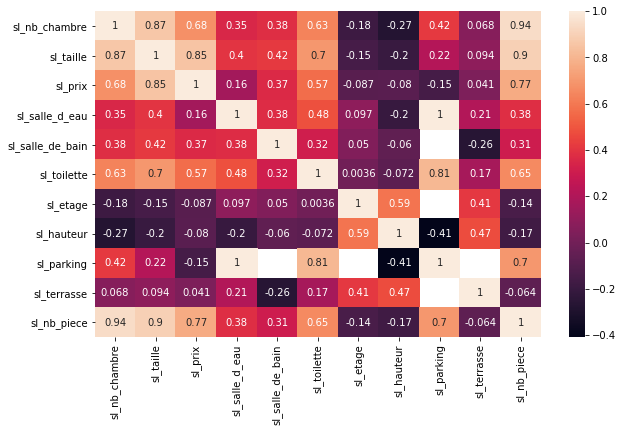

In [19]:
sns.heatmap(numeric_features_l, annot=True)
plt.show()

## Relation between target and no-numeric Features

**count** indique le nombre d'observations non nulles. 

**unique** : indique le nombre de valeurs uniques.

**top** : indique la valeur la plus courante.

**freq** : la fréquence de la valeur maximale indiquée

In [20]:
categoricals = df.select_dtypes(exclude= [np.number])
categoricals.describe()

,sl_style,sl_localisation,sl_annee,sl_ascenseur,sl_vue,sl_cave,sl_exposition,sl_balcon,sl_gardien,sl_neuf,sl_parquet,sl_cuisine
count,237,153,133,143,54,160,113,54,42,14,64,147
unique,5,3,51,1,2,11,8,16,1,1,1,8
top,Appartement,Quartier Les Brotteaux-Bellecombe-Masséna,Année de construction 1900,Ascenseur,Vue,Cave,Orientation Est,1 Balcon,Gardien,Refait à neuf,Parquet,Cuisine séparée
freq,226,61,27,143,43,148,38,27,42,14,64,45


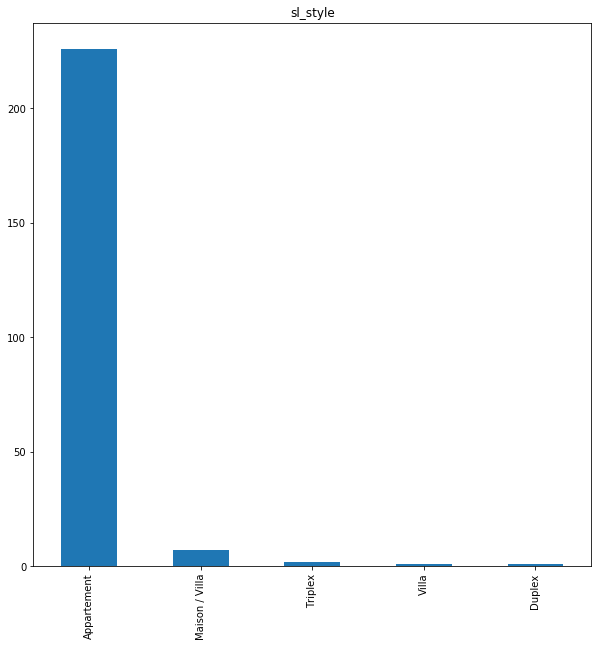

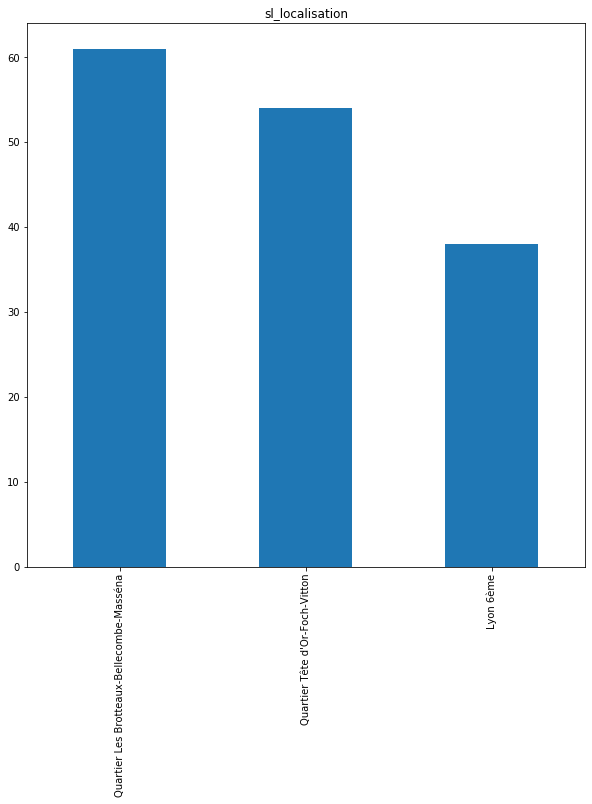

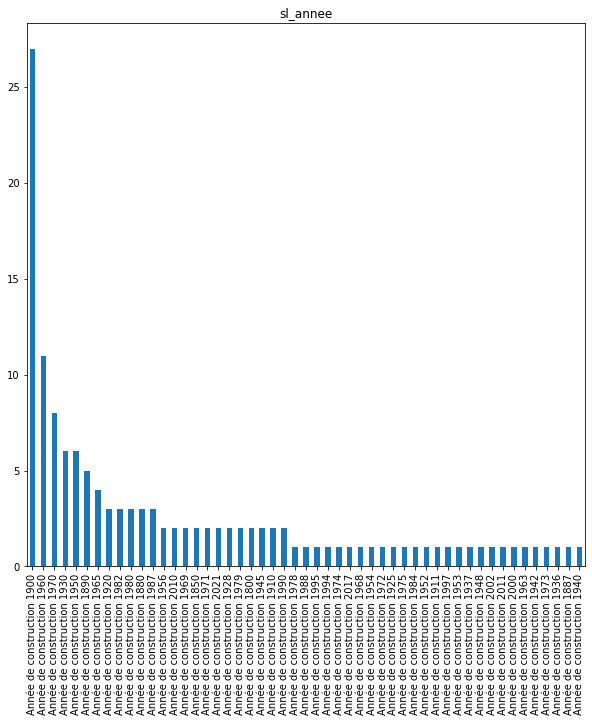

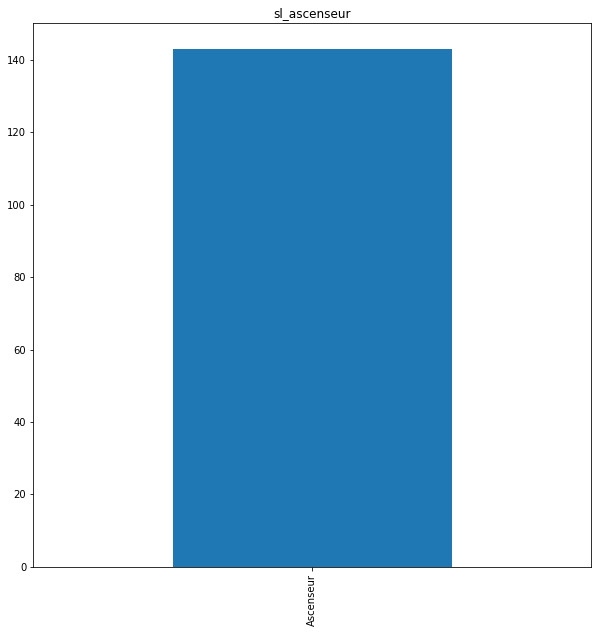

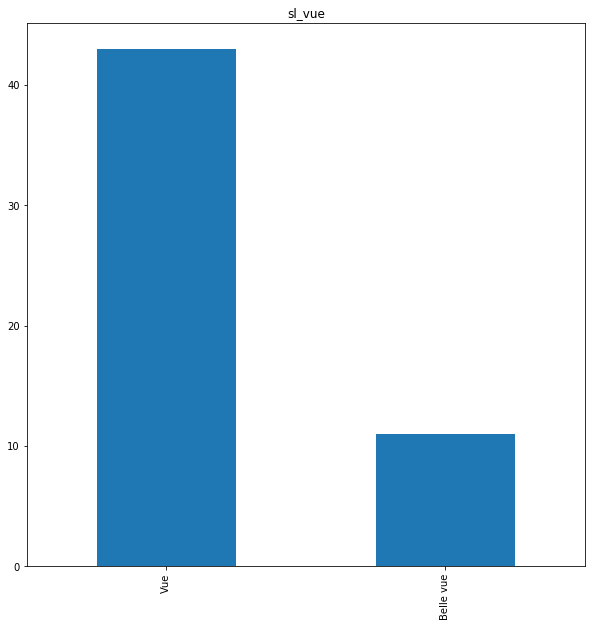

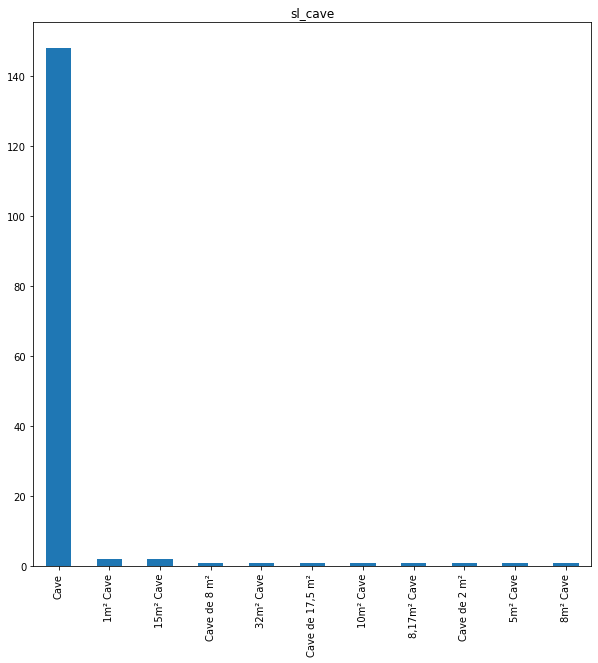

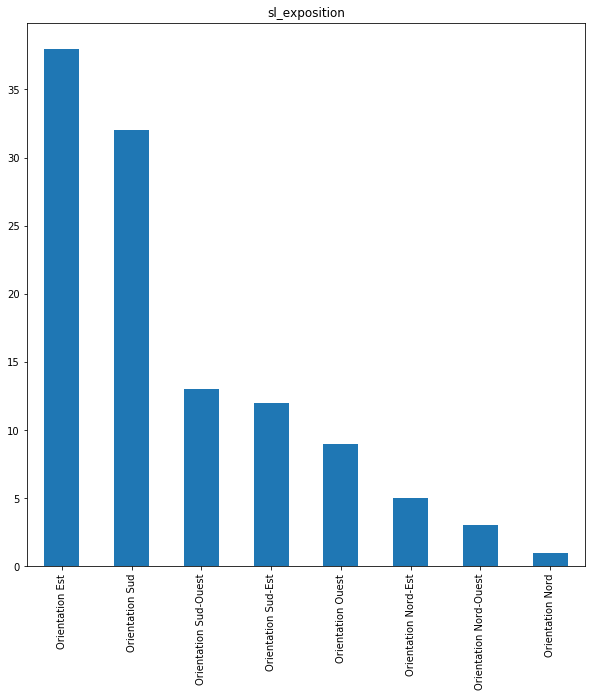

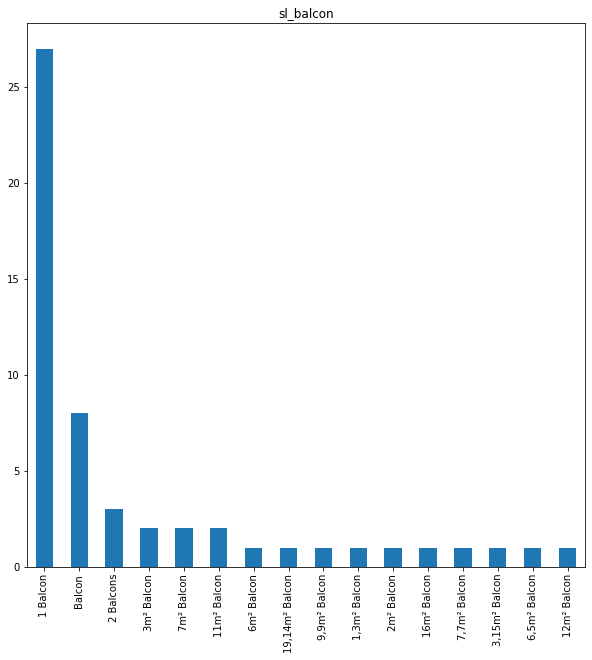

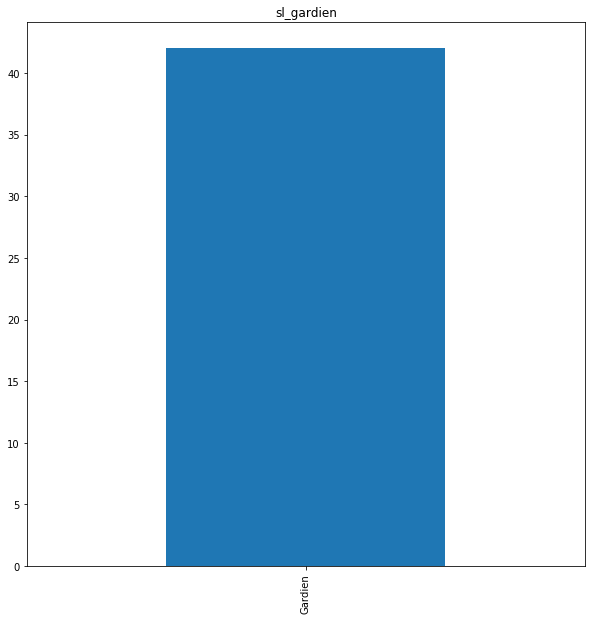

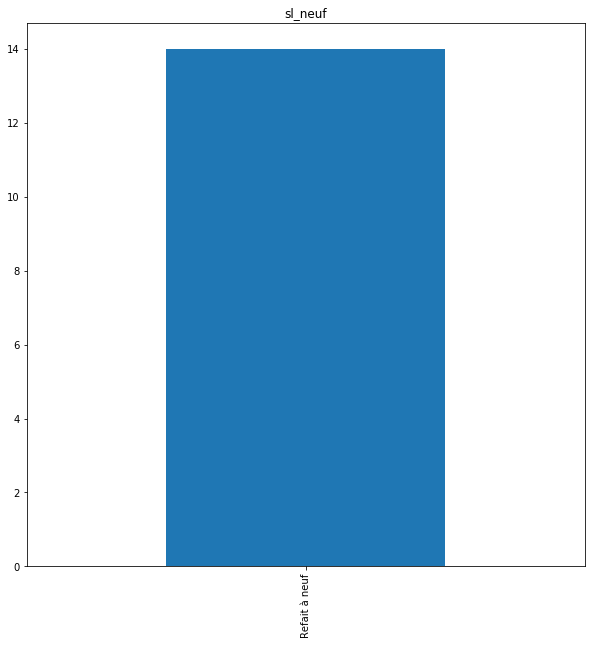

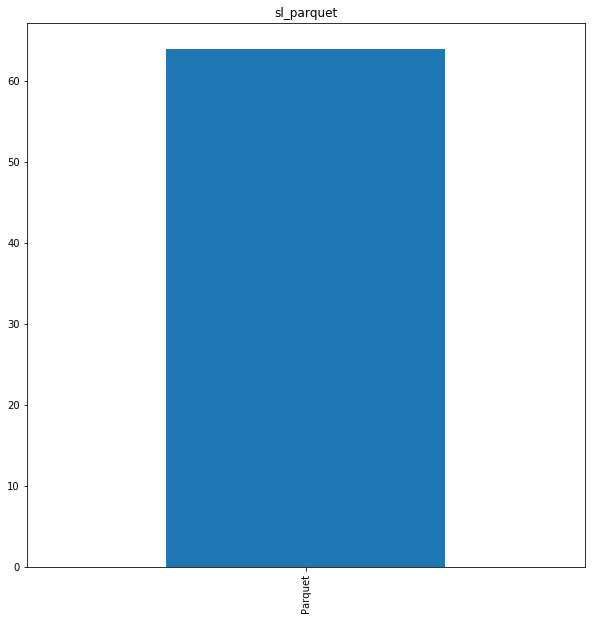

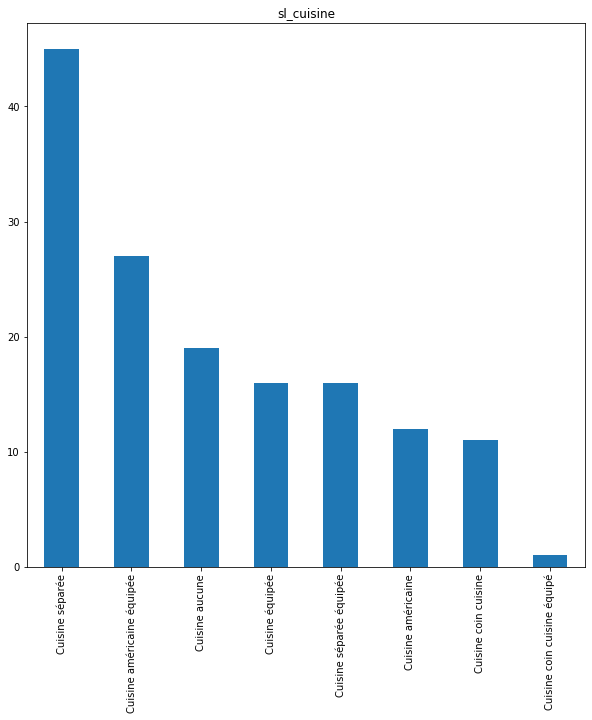

In [21]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
df_non_numeric_cols = df_non_numeric.columns.values

for col in df_non_numeric_cols:
    df[col].value_counts().plot(kind='bar',figsize=(10,10),title=col) 
    plt.show()

Lyon : Notons que le prix d'achat médiane de la cuisine_américaine_équipée est nettement plus élevé que les autres. 

                              sl_prix
sl_cuisine                           
Cuisine américaine           435000.0
Cuisine américaine équipée   649500.0
Cuisine aucune               525000.0
Cuisine coin cuisine         112000.0
Cuisine coin cuisine équipé  210000.0
Cuisine séparée              560000.0
Cuisine séparée équipée      646500.0
Cuisine équipée              474000.0


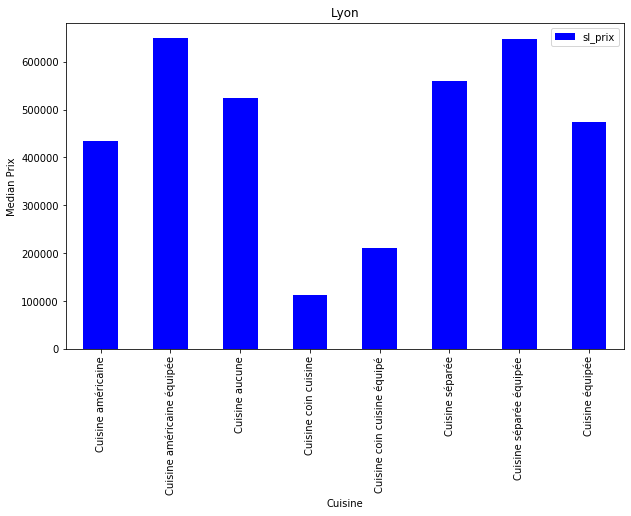

In [21]:
cuisine_pivot = df.pivot_table(index='sl_cuisine', values = 'sl_prix', aggfunc = np.median)
print(cuisine_pivot)

cuisine_pivot.plot(kind='bar', color='blue')
plt.xlabel('Cuisine')
plt.ylabel('Median Prix')
plt.title('Lyon')
plt.show()

                                             sl_prix
sl_localisation                                     
Lyon 6ème                                  1040000.0
Quartier Les Brotteaux-Bellecombe-Masséna   460000.0
Quartier Tête d'Or-Foch-Vitton              630000.0


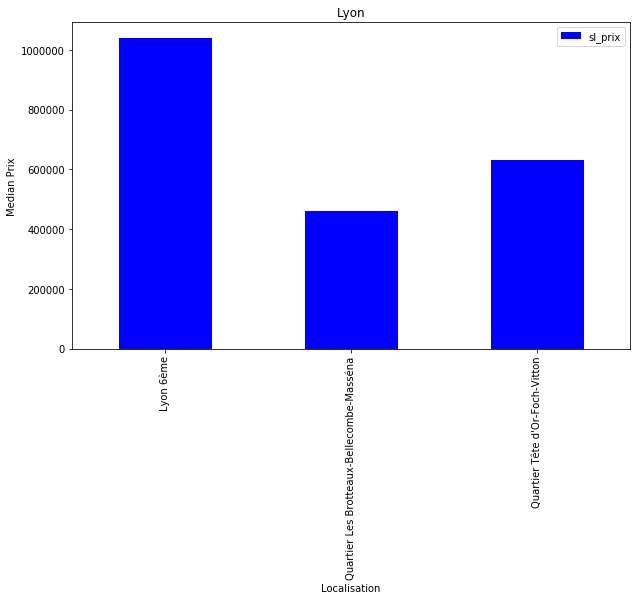

None


In [22]:
localisation = df.pivot_table(index='sl_localisation', values = 'sl_prix', aggfunc = np.median)
print(localisation)
localisation.plot(kind='bar', color='blue')
plt.xlabel('Localisation')
plt.ylabel('Median Prix')
plt.title('Lyon')
print(plt.show())


Concernant la localisation, on remarque que c'est Lyon 6ème qui possède le tarif le plus élevé, par rapport aux 2 autres quartiers.

                         sl_prix
sl_exposition                   
Orientation Est         446500.0
Orientation Nord        410000.0
Orientation Nord-Est    910000.0
Orientation Nord-Ouest  920000.0
Orientation Ouest       277990.0
Orientation Sud         570000.0
Orientation Sud-Est     839000.0
Orientation Sud-Ouest   525000.0


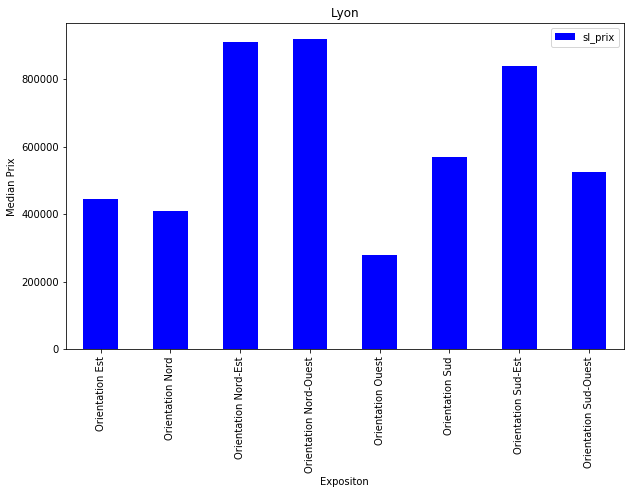

None


In [89]:
exposition = df.pivot_table(index='sl_exposition', values = 'sl_prix', aggfunc = np.median)
print(exposition)

exposition.plot(kind='bar', color='blue')
plt.xlabel('Expositon')
plt.ylabel('Median Prix')
plt.title('Lyon')
plt.legend()
print(plt.show())

D'après les résultats, on remarque que les logements se situant au Nord-Ouest ont le tarif le plus élevé (suivi de ceux se situant au Nord-Est et au Sud-Est).

# Encoding Categorical Features

In [92]:
df.sl_localisation.value_counts()

Quartier Les Brotteaux-Bellecombe-Masséna    61
Quartier Tête d'Or-Foch-Vitton               54
Lyon 6ème                                    38
Name: sl_localisation, dtype: int64

Contrairement à ce qui a été dit précédemment, et d'après ces résultats: le quartier "Les Brotteaux-Bellecombe-Masséna" possède le plus grand nombre de logements.

In [20]:
def encode(x):
    return 1 if x =="Lyon 6ème" else 0


df['sl_localisation_enc'] = df.sl_localisation.apply(encode)


In [94]:
df.sl_cuisine.value_counts()

Cuisine séparée                45
Cuisine américaine équipée     27
Cuisine aucune                 19
Cuisine séparée équipée        16
Cuisine équipée                16
Cuisine américaine             12
Cuisine coin cuisine           11
Cuisine coin cuisine équipé     1
Name: sl_cuisine, dtype: int64

Contrairement à ce qui a été dit précédemment, et d'après ces résultats: la cuisine séparée est dominante par rapport aux autres types de cuisines, quelques soient le logement et le tarif.

In [21]:
def encode(x):
    return 1 if x =='Cuisine américaine équipée' else 0


df['sl_cuisine_enc'] = df.sl_cuisine.apply(encode)


In [22]:
def encode(x):
    return 1 if x =='Orientation Nord-Ouest' else 0

df['sl_exposition_enc'] = df.sl_exposition.apply(encode)

In [97]:
df.sl_exposition.value_counts()

Orientation Est           38
Orientation Sud           32
Orientation Sud-Ouest     13
Orientation Sud-Est       12
Orientation Ouest          9
Orientation Nord-Est       5
Orientation Nord-Ouest     3
Orientation Nord           1
Name: sl_exposition, dtype: int64

Contrairement à ce qui a été dit précédemment, et d'après ces résultats: il y a plus de logements se situant à l'est de Lyon (quelque soit le prix de ces derniers).

In [23]:
def encode(x):
    return 1 if x =='Belle vue' else 0


df['sl_vue_enc'] = df.sl_vue.apply(encode)


In [24]:
def encode(x):
    return 1 if x =='Ascenseur' else 0


df['sl_ascenseur_enc'] = df.sl_ascenseur.apply(encode)

In [25]:
def encode(x):
    return 1 if x =='Refait à neuf' else 0


df['sl_neuf_enc'] = df.sl_neuf.apply(encode)

In [26]:
def encode(x):
    return 1 if x =='Cave' else 0


df['sl_cave_enc'] = df.sl_cave.apply(encode)

In [102]:
annee_pivot = df.pivot_table(index='sl_annee', values = 'sl_prix', aggfunc = np.median)
df.sl_annee.value_counts()

Année de construction 1900    27
Année de construction 1960    11
Année de construction 1970     8
Année de construction 1950     6
Année de construction 1930     6
Année de construction 1890     5
Année de construction 1965     4
Année de construction 1980     3
Année de construction 1880     3
Année de construction 1987     3
Année de construction 1982     3
Année de construction 1920     3
Année de construction 1990     2
Année de construction 2021     2
Année de construction 1956     2
Année de construction 1969     2
Année de construction 2010     2
Année de construction 1979     2
Année de construction 1800     2
Année de construction 1850     2
Année de construction 1945     2
Année de construction 1928     2
Année de construction 1910     2
Année de construction 1971     2
Année de construction 1975     1
Année de construction 1997     1
Année de construction 1988     1
Année de construction 2011     1
Année de construction 1940     1
Année de construction 1973     1
Année de c

D'après ces résultats, on remarque qu'il y a plus de logements construits en 1900.

In [27]:
def encode(x):
    return 1 if x == 'Année de construction 1900' else 0


df['sl_annee_enc'] = df.sl_annee.apply(encode)


In [28]:
def encode(x):
    return 1 if x =='1 Balcon' else 0


df['sl_balcon_enc'] = df.sl_balcon.apply(encode)

In [29]:
def encode(x):
    return 1 if x =='Parquet' else 0


df['sl_parquet_enc'] = df.sl_parquet.apply(encode)

In [106]:
df.sl_style.value_counts()

Appartement       226
Maison / Villa      7
Triplex             2
Duplex              1
Villa               1
Name: sl_style, dtype: int64

D'après ces résultats, les appartements sont dominants par rapport aux autres types de logements. 

In [30]:
def encode(x):
    return 1 if x =='Maison / Villa' else 0


df['sl_style_enc'] = df.sl_style.apply(encode)

In [31]:
def encode(x):
    return 1 if x =='Gardien' else 0


df['sl_gardien_enc'] = df.sl_gardien.apply(encode)

# Missing data : Interpolation 

Cela permet de remplir les valeurs manquantes par une valeur moyenne.



In [32]:

data_Lyon= df.select_dtypes(include=[np.number]).interpolate().dropna()
#data_Lyon.to_csv("dataLyon_sl_bd.csv", index=False)

# Modèle Linéaire

In [36]:
from sklearn.model_selection import train_test_split

X =  data_Lyon.drop(['sl_prix'], axis=1)
y = np.log(data_Lyon.sl_prix)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Accuracy

In [37]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_test, y_test)

0.7080302267473337

In [38]:
y_pred = model.predict(X_test)

## RMSE 

In [39]:
from sklearn.metrics import mean_squared_error
def RMSE (y_test, y_pred):
    return mean_squared_error(y_test, y_pred)
# la distance entre nos valeurs prévues et les valeurs réelles.
RMSE(y_test, y_pred)

0.1163234082357537

On remarque que le RMSE est proche de 0. On en déduit que la distance entre les valuers réelles et les valeurs prévues est quasi nulle.

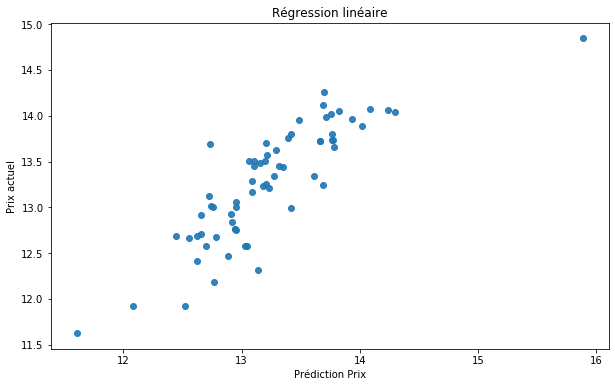

In [60]:
plt.scatter(y_pred, y_test, alpha=0.9)
plt.xlabel('Prédiction Prix')
plt.ylabel('Prix actuel')
plt.title('Régression linéaire')
plt.show()


# Cross-validation et gridsearch


In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import ensemble



models = {'LR': LinearRegression(),
          'Lasso': Lasso(),
          'Ridge': Ridge(),
          'Elastic_net' :  ElasticNet()}

 


params= {
    'LR': {'fit_intercept': [True, False]},
    'Lasso' : {'alpha': [0.001,0.01,0.02,0.025,0.05,0.25,0.5,1,5,10]},
    'Ridge' : {'alpha': [100,50,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0.001]},
    'Elastic_net': {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                     'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] }     
}



 

def gridCV_fit(X_train,y_train):
    Evaluation_CV_result={}
    
    for model_name in models.keys():
        print(model_name)
        grid=GridSearchCV(estimator=models[model_name], param_grid=params[model_name], cv=5, n_jobs=4,verbose=10,return_train_score=True)
        grid.fit(X_train,y_train)  
        print("best estimator are: {}".format(grid.best_params_))
        print("best parameters are: {}".format(grid.best_estimator_))
        print("best scores are: {}".format(grid.best_score_))
        Evaluation_CV_result[model_name]=[grid.best_score_]
    df_CV_result=pd.DataFrame(Evaluation_CV_result, index =['CV_score']) 
    return  df_CV_result

In [41]:
gridCV_fit(X_train,y_train)

LR
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    2.8s remaining:    1.2s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0750s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0510s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


best estimator are: {'fit_intercept': True}
best parameters are: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
best scores are: 0.38524812933999464
Lasso
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0560s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0370s.) Setting batch_size=8.


best estimator are: {'alpha': 0.01}
best parameters are: Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best scores are: 0.5732843741584206
Ridge
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0480s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s


best estimator are: {'alpha': 10}
best parameters are: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
best scores are: 0.5801822587481575
Elastic_net
Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=4)]: Batch computation too fast (0.0360s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0730s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1950s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 296 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 337 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 350 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 363 tasks      | elapsed:    1.4s


best estimator are: {'alpha': 0.1, 'l1_ratio': 0}
best parameters are: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
best scores are: 0.5818923190605689


[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    1.4s finished
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.87074652034285, tolerance: 0.007437274659585142
  positive)


,LR,Lasso,Ridge,Elastic_net
CV_score,0.385248,0.573284,0.580182,0.581892


## Prediction Prix avec Elastic_net

In [65]:
my_best_model= ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False).fit(X_train,y_train)
# Use the model to make predictions
predicted_prices = my_best_model.predict(X_test)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.851932335230217, tolerance: 0.007437274659585142
  positive)


## RMSE

In [66]:
mean_squared_error(y_test, predicted_prices )

0.11840435582915768

On remarque que le RMSE est proche de 0.

In [67]:
final_predictions = np.exp(predicted_prices)


In [68]:
print ("Original predictions are: \n", predicted_prices[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [13.27971428 13.19104005 13.28573259 13.44303566 13.06020753] 

Final predictions are: 
 [585203.11825967 535544.92007856 588735.6742378  689026.94680743
 469868.21180579]


On remarque une différence significative entre les prédictions originales et les prédictions finales.

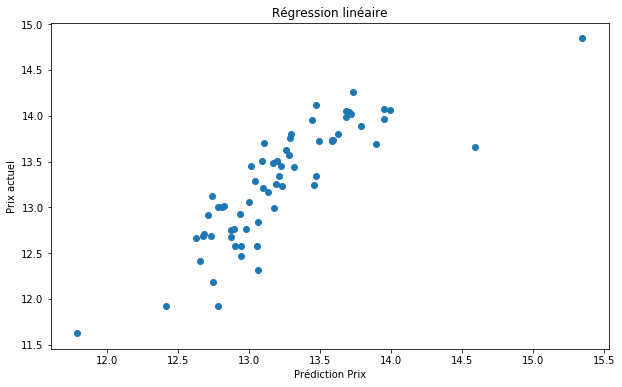

In [69]:
plt.scatter(predicted_prices, y_test, alpha=1)
plt.xlabel('Prédiction Prix')
plt.ylabel('Prix actuel')
plt.title('Régression linéaire')
plt.show()


# GradientBoostingRegressor

In [70]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf.fit(X_train, y_train)

clf.score(X_test,y_test)

0.8875240140897246

## RMSE GradientBoostingRegressor

In [71]:
y_predic = clf.predict(X_test)
mean_squared_error(y_test, y_predic)

0.044811453870731696

## Prediction Prices 

In [74]:
predict_prices = clf.predict(X_test)
predict_final = np.exp(predict_prices)
y_test = np.exp(y_test)

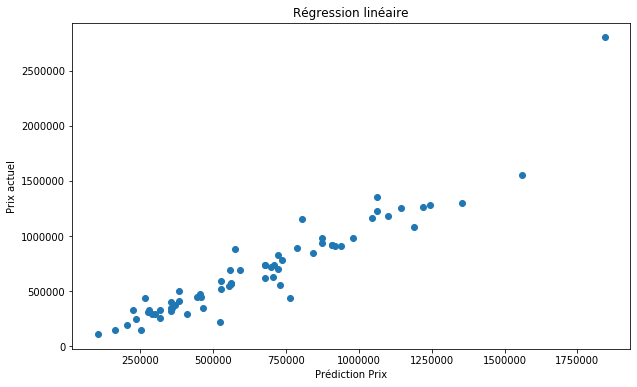

In [75]:
plt.scatter(predict_final, y_test, alpha=1)
plt.xlabel('Prédiction Prix')
plt.ylabel('Prix actuel')
plt.title('Régression linéaire')
plt.show()